In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import NearMiss
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.e

In [2]:
data=pd.read_csv("train_ctrUa4K.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
pd.options.display.float_format = '{:,.0f}'.format

In [4]:
data['Dependents']=data.Dependents.map({'0':'zero','1':'one','2':'two','3+':'three_or_more'})
data['Credit_History']=data.Credit_History.map({0:'zero',1:'one'})
data['Loan_Amount_Term']=data.Loan_Amount_Term.map({12:'one',36:'three',60:'five',84:'seven',120:'ten',180:'fifteen',240:'twenty',300:'twentyfive',360:'thirty',480:'forty'})

In [5]:
for column in ('Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term','Property_Area','Education'):
    data[column].fillna(data[column].mode()[0],inplace=True)
for column in ('LoanAmount','CoapplicantIncome','ApplicantIncome'):
    data[column].fillna(data[column].mean(),inplace=True)

In [6]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
data['Education'] = data['Education'].str.replace(' ','_')

In [8]:
data['Loan_Status']=data.Loan_Status.map({'Y':0,'N':1})
Y=data['Loan_Status'].values
data.drop(['Loan_Status'],axis=1,inplace=True)
X=data[data.iloc[:,1:13].columns]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
print("="*50,"Gender","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Gender'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Gender_ohe = vectorizer.transform(X_train['Gender'].values)
X_test_Gender_ohe = vectorizer.transform(X_test['Gender'].values)

print("After vectorizations")
print(X_train_Gender_ohe.shape, y_train.shape)
print(X_test_Gender_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Married","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Married'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Married_ohe = vectorizer.transform(X_train['Married'].values)
X_test_Married_ohe = vectorizer.transform(X_test['Married'].values)

print("After vectorizations")
print(X_train_Married_ohe.shape, y_train.shape)
print(X_test_Married_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Dependents","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Dependents'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Dependents_ohe = vectorizer.transform(X_train['Dependents'].values)
X_test_Dependents_ohe = vectorizer.transform(X_test['Dependents'].values)

print("After vectorizations")
print(X_train_Dependents_ohe.shape, y_train.shape)
print(X_test_Dependents_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


print("="*50,"Education","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Education'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Education_ohe = vectorizer.transform(X_train['Education'].values)
X_test_Education_ohe = vectorizer.transform(X_test['Education'].values)

print("After vectorizations")
print(X_train_Education_ohe.shape, y_train.shape)
print(X_test_Education_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


print("="*50,"Self_Employed","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Self_Employed'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Self_Employed_ohe = vectorizer.transform(X_train['Self_Employed'].values)
X_test_Self_Employed_ohe = vectorizer.transform(X_test['Self_Employed'].values)

print("After vectorizations")
print(X_train_Self_Employed_ohe.shape, y_train.shape)
print(X_test_Self_Employed_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Property_Area","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Property_Area'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Property_Area_ohe = vectorizer.transform(X_train['Property_Area'].values)
X_test_Property_Area_ohe = vectorizer.transform(X_test['Property_Area'].values)

print("After vectorizations")
print(X_train_Property_Area_ohe.shape, y_train.shape)
print(X_test_Property_Area_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Loan_Amount_Term","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Loan_Amount_Term'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Loan_Amount_Term_ohe = vectorizer.transform(X_train['Loan_Amount_Term'].values)
X_test_Loan_Amount_Term_ohe = vectorizer.transform(X_test['Loan_Amount_Term'].values)

print("After vectorizations")
print(X_train_Loan_Amount_Term_ohe.shape, y_train.shape)
print(X_test_Loan_Amount_Term_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Credit_History","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Credit_History'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Credit_History_ohe = vectorizer.transform(X_train['Credit_History'].values)
X_test_Credit_History_ohe = vectorizer.transform(X_test['Credit_History'].values)

print("After vectorizations")
print(X_train_Credit_History_ohe.shape, y_train.shape)
print(X_test_Credit_History_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


================================================== Gender ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['female', 'male']

================================================== Married ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['no', 'yes']

================================================== Dependents ==================================================
After vectorizations
(411, 4) (411,)
(203, 4) (203,)
['one', 'three_or_more', 'two', 'zero']

================================================== Education ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['graduate', 'not_graduate']

================================================== Self_Employed ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['no', 'yes']

================================================== Pro

In [11]:
from sklearn.preprocessing import Normalizer
print("="*50,"LoanAmount","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['LoanAmount'].values.reshape(1,-1))

X_train_LoanAmount_norm = normalizer.transform(X_train['LoanAmount'].values.reshape(1,-1))
X_test_LoanAmount_norm = normalizer.transform(X_test['LoanAmount'].values.reshape(1,-1))

X_train_LoanAmount_norm = X_train_LoanAmount_norm.reshape(-1,1)
X_test_LoanAmount_norm = X_test_LoanAmount_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_LoanAmount_norm.shape, y_train.shape)
print(X_test_LoanAmount_norm.shape, y_test.shape)
print()

print("="*50,"ApplicantIncome","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['ApplicantIncome'].values.reshape(1,-1))

X_train_ApplicantIncome_norm = normalizer.transform(X_train['ApplicantIncome'].values.reshape(1,-1))
X_test_ApplicantIncome_norm = normalizer.transform(X_test['ApplicantIncome'].values.reshape(1,-1))

X_train_ApplicantIncome_norm = X_train_ApplicantIncome_norm.reshape(-1,1)
X_test_ApplicantIncome_norm = X_test_ApplicantIncome_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_ApplicantIncome_norm.shape, y_train.shape)
print(X_test_ApplicantIncome_norm.shape, y_test.shape)
print()

print("="*50,"CoapplicantIncome","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['CoapplicantIncome'].values.reshape(1,-1))

X_train_CoapplicantIncome_norm = normalizer.transform(X_train['CoapplicantIncome'].values.reshape(1,-1))
X_test_CoapplicantIncome_norm = normalizer.transform(X_test['CoapplicantIncome'].values.reshape(1,-1))

X_train_CoapplicantIncome_norm = X_train_CoapplicantIncome_norm.reshape(-1,1)
X_test_CoapplicantIncome_norm = X_test_CoapplicantIncome_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_CoapplicantIncome_norm.shape, y_train.shape)
print(X_test_CoapplicantIncome_norm.shape, y_test.shape)

================================================== LoanAmount ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)

================================================== ApplicantIncome ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)

================================================== CoapplicantIncome ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)


In [12]:
from scipy.sparse import hstack
X_tr = hstack((X_train_Gender_ohe, X_train_Married_ohe, X_train_Dependents_ohe,X_train_Education_ohe,X_train_Self_Employed_ohe,X_train_Property_Area_ohe,X_train_Loan_Amount_Term_ohe,X_train_Credit_History_ohe,X_train_LoanAmount_norm,X_train_ApplicantIncome_norm,X_train_CoapplicantIncome_norm)).tocsr()
X_te = hstack((X_test_Gender_ohe, X_test_Married_ohe, X_test_Dependents_ohe,X_test_Education_ohe,X_test_Self_Employed_ohe,X_test_Property_Area_ohe,X_test_Loan_Amount_Term_ohe,X_test_Credit_History_ohe,X_test_LoanAmount_norm,X_test_ApplicantIncome_norm,X_test_CoapplicantIncome_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*125)

Final Data matrix
(411, 29) (411,)
(203, 29) (203,)


# Logistic Regression

In [13]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
classifier = GridSearchCV(LogisticRegression(), param_grid,cv=10,scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr, y_train)

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

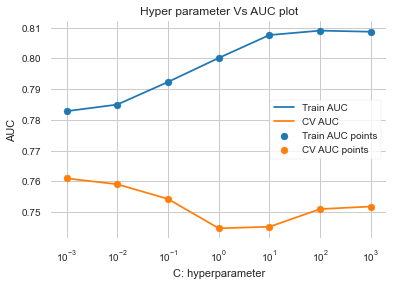

In [14]:
results_tf = pd.DataFrame.from_dict(classifier.cv_results_)
results_tf = results_tf.sort_values(['param_C'])
train_auc= results_tf['mean_train_score']
train_auc_std= results_tf['std_train_score']
cv_auc = results_tf['mean_test_score'] 
cv_auc_std= results_tf['std_test_score']
A =  results_tf['param_C']
plt.plot(A, train_auc, label='Train AUC')


plt.plot(A, cv_auc, label='CV AUC')

plt.scatter(A, train_auc, label='Train AUC points')
plt.scatter(A, cv_auc, label='CV AUC points')
plt.xscale('log')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [15]:
best_param=classifier.best_params_
print("Best Hyperparameter: ",best_param)
p_C=best_param['C']

Best Hyperparameter:  {'C': 0.001}


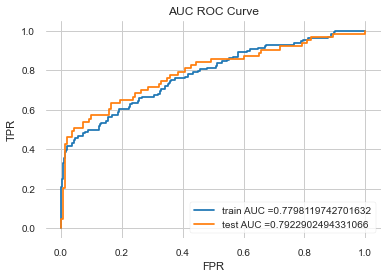

In [16]:
from sklearn.metrics import roc_curve, auc


Log_model = LogisticRegression(C=p_C)
Log_model.fit(X_tr, y_train)


y_train_pred = Log_model.predict_proba(X_tr)    
y_test_pred = Log_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [17]:
#Computing AUC_Score with best parameter
AUC_Score_test_LOG=metrics.roc_auc_score(y_test,y_test_pred[:,1])
print('AUC_Score on test data: ',AUC_Score_test_LOG)
AUC_Score_train_LOG=metrics.roc_auc_score(y_train,y_train_pred[:,1])
print('AUC_Score on train data: ',AUC_Score_train_LOG)

AUC_Score on test data:  0.7922902494331066
AUC_Score on train data:  0.7798119742701632


In [18]:
#y_test_predict=predict_with_best_t(y_test_pred[:,1], best_t)
y_test_predict=Log_model.predict(X_te)
print("Recall for logistic regression model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for logistic regression model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for logistic regression model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for logistic regression model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for logistic regression model:",metrics.log_loss(y_test,y_test_predict))

Recall for logistic regression model: 0.0
Precision for logistic regression model: 0.0
Accuracy for logistic regression model: 0.6896551724137931
F-score for logistic regression model: 0.0
Log-loss for logistic regression model: 10.718930605317107


C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
importance = Log_model.coef_[0]
importance

array([ 0.00294854, -0.00294854,  0.0078921 , -0.0078921 ,  0.00139759,
        0.00264101, -0.00631917,  0.00228057, -0.00611714,  0.00611714,
        0.00396514, -0.00396514,  0.01091103, -0.01488979,  0.00397875,
       -0.00080042, -0.00062706,  0.00220391, -0.00061876, -0.00092819,
        0.00052266,  0.00068642, -0.00061969,  0.00018113, -0.03335651,
        0.0333565 ,  0.00030746, -0.00016747,  0.0008101 ])

In [22]:
importances = Log_model.coef_[0] #array with importances of each feature
ind = np.arange(0, X_tr.shape[1]) #create an index array, with the number of features
#only keep features whose importance is greater than 0
X_tr_features_to_keep = X_tr[:,ind[importances > 0.01]] 
X_te_features_to_keep = X_te[:,ind[importances > 0.01]]

In [23]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
classifier = GridSearchCV(LogisticRegression(), param_grid,cv=3,scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_features_to_keep, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [24]:
best_param=classifier.best_params_
print("Best Hyperparameter: ",best_param)
p_C=best_param['C']

Best Hyperparameter:  {'C': 0.001}


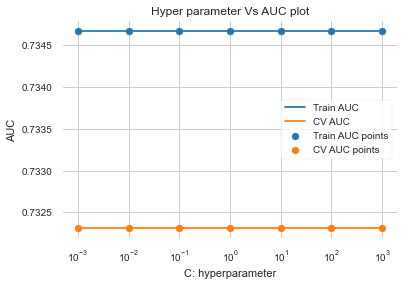

In [25]:
results_tf = pd.DataFrame.from_dict(classifier.cv_results_)
results_tf = results_tf.sort_values(['param_C'])
train_auc= results_tf['mean_train_score']
train_auc_std= results_tf['std_train_score']
cv_auc = results_tf['mean_test_score'] 
cv_auc_std= results_tf['std_test_score']
A =  results_tf['param_C']
plt.plot(A, train_auc, label='Train AUC')


plt.plot(A, cv_auc, label='CV AUC')

plt.scatter(A, train_auc, label='Train AUC points')
plt.scatter(A, cv_auc, label='CV AUC points')
plt.xscale('log')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

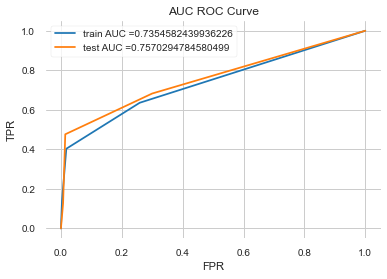

In [28]:
from sklearn.metrics import roc_curve, auc


Log_model = LogisticRegression(C=p_C)
Log_model.fit(X_tr_features_to_keep, y_train)


y_train_pred = Log_model.predict_proba(X_tr_features_to_keep)    
y_test_pred = Log_model.predict_proba(X_te_features_to_keep)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [29]:
y_test_predict=Log_model.predict(X_te_features_to_keep)
print("Recall for logistic regression model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for logistic regression model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for logistic regression model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for logistic regression model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for logistic regression model:",metrics.log_loss(y_test,y_test_predict))

Recall for logistic regression model: 0.0
Precision for logistic regression model: 0.0
Accuracy for logistic regression model: 0.6896551724137931
F-score for logistic regression model: 0.0
Log-loss for logistic regression model: 10.718930605317107


C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Model

In [30]:
min_sample_leaf_val=[1,2,3,4,5,6,7,8,9,10]
criterion_val=['entropy','gini']
max_depth=[1,2,3,4,5,6,7,8,9,10]
min_samples_split=[10,100,150,200,250]
param_grid = {'max_depth':max_depth,'criterion':criterion_val,'min_samples_leaf':min_sample_leaf_val,'min_samples_split':min_samples_split}
DT_model=DecisionTreeClassifier()
clf = GridSearchCV(estimator=DT_model, param_grid=param_grid, cv=3)
clf.fit(X_tr,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [31]:
best_param=clf.best_params_
print("Best Hyperparameter: ",best_param)
max_depth_DT=best_param['max_depth']
min_samples_split_DT=best_param['min_samples_split']
min_samples_leaf_DT=best_param['min_samples_leaf']
criterion_DT=best_param['criterion']

Best Hyperparameter:  {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 10}


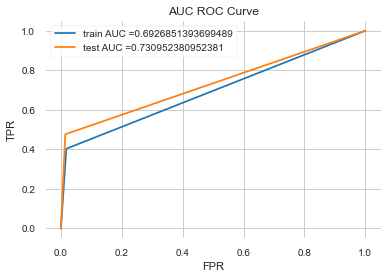

In [32]:
from sklearn.metrics import roc_curve, auc


DT_model= DecisionTreeClassifier(max_depth=max_depth_DT,min_samples_leaf=min_samples_leaf_DT,criterion=criterion_DT,min_samples_split=min_samples_split_DT)
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
DT_model.fit(X_tr, y_train)


y_train_pred = DT_model.predict_proba(X_tr)    
y_test_pred = DT_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [33]:
DT_pred=DT_model.predict(X_te)
print("Recall for decision tree model:",metrics.recall_score(y_test,DT_pred))
print("Precision for decision tree model:",metrics.precision_score(y_test,DT_pred))
print("Accuracy for decision tree model:",metrics.accuracy_score(y_test,DT_pred))
print("F-score for decision tree model:",metrics.f1_score(y_test,DT_pred))
print("Log-loss for decision tree model:",metrics.log_loss(y_test,DT_pred))

Recall for decision tree model: 0.47619047619047616
Precision for decision tree model: 0.9375
Accuracy for decision tree model: 0.8275862068965517
F-score for decision tree model: 0.631578947368421
Log-loss for decision tree model: 5.954969325205588


In [34]:
importances = DT_model.feature_importances_ 
print(importances)#array with importances of each feature
ind = np.arange(0, X_tr.shape[1]) #create an index array, with the number of features
#only keep features whose importance is greater than 0
X_tr_features_to_keep = X_tr[:,ind[importances > 0]] 
X_te_features_to_keep = X_te[:,ind[importances > 0]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0.]


In [35]:
"""from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
classifier = GridSearchCV(LogisticRegression(), param_grid,cv=3,scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_features_to_keep, y_train)"""

"from sklearn.linear_model import LogisticRegression\nparam_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }\nclassifier = GridSearchCV(LogisticRegression(), param_grid,cv=3,scoring='roc_auc',return_train_score=True)\nclassifier.fit(X_tr_features_to_keep, y_train)"

In [36]:
"""best_param=classifier.best_params_
print("Best Hyperparameter: ",best_param)
p_C=best_param['C']"""

'best_param=classifier.best_params_\nprint("Best Hyperparameter: ",best_param)\np_C=best_param[\'C\']'

In [37]:
"""results_tf = pd.DataFrame.from_dict(classifier.cv_results_)
results_tf = results_tf.sort_values(['param_C'])
train_auc= results_tf['mean_train_score']
train_auc_std= results_tf['std_train_score']
cv_auc = results_tf['mean_test_score'] 
cv_auc_std= results_tf['std_test_score']
A =  results_tf['param_C']
plt.plot(A, train_auc, label='Train AUC')


plt.plot(A, cv_auc, label='CV AUC')

plt.scatter(A, train_auc, label='Train AUC points')
plt.scatter(A, cv_auc, label='CV AUC points')
plt.xscale('log')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()"""

'results_tf = pd.DataFrame.from_dict(classifier.cv_results_)\nresults_tf = results_tf.sort_values([\'param_C\'])\ntrain_auc= results_tf[\'mean_train_score\']\ntrain_auc_std= results_tf[\'std_train_score\']\ncv_auc = results_tf[\'mean_test_score\'] \ncv_auc_std= results_tf[\'std_test_score\']\nA =  results_tf[\'param_C\']\nplt.plot(A, train_auc, label=\'Train AUC\')\n\n\nplt.plot(A, cv_auc, label=\'CV AUC\')\n\nplt.scatter(A, train_auc, label=\'Train AUC points\')\nplt.scatter(A, cv_auc, label=\'CV AUC points\')\nplt.xscale(\'log\')\n\nplt.legend()\nplt.xlabel("C: hyperparameter")\nplt.ylabel("AUC")\nplt.title("Hyper parameter Vs AUC plot")\nplt.grid()\nplt.show()'

In [38]:
"""from sklearn.metrics import roc_curve, auc


DT = LogisticRegression(C=p_C)
DT.fit(X_tr_features_to_keep, y_train)


y_train_pred = DT.predict_proba(X_tr_features_to_keep)    
y_test_pred = DT.predict_proba(X_te_features_to_keep)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()"""

'from sklearn.metrics import roc_curve, auc\n\n\nDT = LogisticRegression(C=p_C)\nDT.fit(X_tr_features_to_keep, y_train)\n\n\ny_train_pred = DT.predict_proba(X_tr_features_to_keep)    \ny_test_pred = DT.predict_proba(X_te_features_to_keep)\n\ntrain_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])\ntest_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])\n\nplt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))\nplt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))\nplt.legend()\nplt.xlabel("FPR")\nplt.ylabel("TPR")\nplt.title("AUC ROC Curve")\nplt.grid()\nplt.show()'

In [39]:
"""y_test_predict=DT.predict(X_te_features_to_keep)
print("Recall for logistic regression model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for logistic regression model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for logistic regression model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for logistic regression model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for logistic regression model:",metrics.log_loss(y_test,y_test_predict))"""

'y_test_predict=DT.predict(X_te_features_to_keep)\nprint("Recall for logistic regression model:",metrics.recall_score(y_test,y_test_predict))\nprint("Precision for logistic regression model:",metrics.precision_score(y_test,y_test_predict))\nprint("Accuracy for logistic regression model:",metrics.accuracy_score(y_test,y_test_predict))\nprint("F-score for logistic regression model:",metrics.f1_score(y_test,y_test_predict))\nprint("Log-loss for logistic regression model:",metrics.log_loss(y_test,y_test_predict))'

# NaiveBayesModel

In [40]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
param_grid = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100],'class_prior': [None,[0.5,0.5], [0.1,0.9],[0.2,0.8]]}
clf = GridSearchCV(NB, param_grid=param_grid, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                         'class_prior': [None, [0.5, 0.5], [0.1, 0.9],
                                         [0.2, 0.8]]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

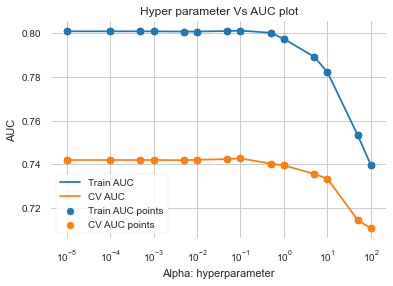

In [41]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
A =  results['param_alpha']
plt.plot(A, train_auc, label='Train AUC')

# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(A, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(A, train_auc, label='Train AUC points')
plt.scatter(A, cv_auc, label='CV AUC points')
plt.xscale('log')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [42]:
best_param=clf.best_params_
print("Best Hyperparameter: ",best_param)
Alpha_BoW=best_param['alpha']
Class_Prior_BoW=best_param['class_prior']

Best Hyperparameter:  {'alpha': 0.1, 'class_prior': None}


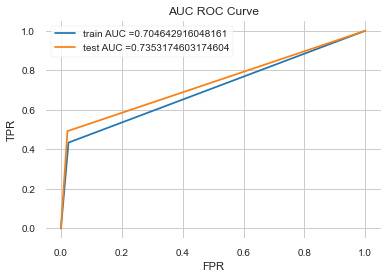

In [43]:
from sklearn.metrics import roc_curve, auc


NB = MultinomialNB(alpha=best_param['alpha'],class_prior=best_param['class_prior'])
NB.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = NB.predict_proba(X_tr)    
y_test_pred = NB.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [44]:
y_test_predict=NB.predict(X_te)
print("Recall for Naive Bayes model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Naive Bayes model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Naive Bayes model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Naive Bayes model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Naive Bayes model:",metrics.log_loss(y_test,y_test_predict))

Recall for Naive Bayes model: 0.49206349206349204
Precision for Naive Bayes model: 0.9117647058823529
Accuracy for Naive Bayes model: 0.8275862068965517
F-score for Naive Bayes model: 0.6391752577319587
Log-loss for Naive Bayes model: 5.954973264109185


# KNN Model

In [45]:
n_neighbors_val=[5,10,20,30,40,50]
KNN_model = KNeighborsClassifier()
param_grid={'n_neighbors':n_neighbors_val}
clf=GridSearchCV(estimator=KNN_model,param_grid=param_grid,cv=5,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

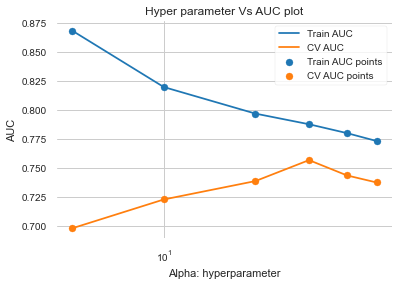

In [46]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
A =  results['param_n_neighbors']
plt.plot(A, train_auc, label='Train AUC')

# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(A, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(A, train_auc, label='Train AUC points')
plt.scatter(A, cv_auc, label='CV AUC points')
plt.xscale('log')

plt.legend()
plt.xlabel("Neighbor: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [47]:
best_param=clf.best_params_
print("Best Hyperparameter: ",best_param)
Neighbor=best_param['n_neighbors']

Best Hyperparameter:  {'n_neighbors': 30}


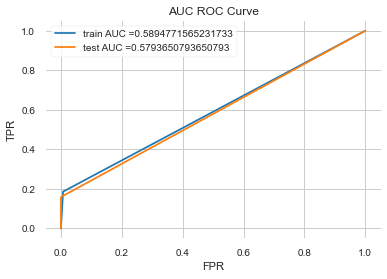

In [48]:
from sklearn.metrics import roc_curve, auc


Knn = KNeighborsClassifier(n_neighbors=best_param['n_neighbors'])
Knn.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = Knn.predict_proba(X_tr)    
y_test_pred = Knn.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [49]:
y_test_predict=Knn.predict(X_te)
print("Recall for KNN model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for KNN model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for KNN model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for KNN model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for KNN model:",metrics.log_loss(y_test,y_test_predict))

Recall for KNN model: 0.15873015873015872
Precision for KNN model: 1.0
Accuracy for KNN model: 0.7389162561576355
F-score for KNN model: 0.27397260273972607
Log-loss for KNN model: 9.017513048917568


In [50]:
from sklearn.inspection import permutation_importance
results = permutation_importance(Knn,X_tr.toarray(), y_train, scoring='accuracy')
importance = results.importances_mean
print(importance)

[-0.00291971 -0.00291971 -0.00729927 -0.00729927 -0.00486618 -0.00243309
 -0.00778589 -0.01411192 -0.00048662 -0.00048662 -0.00145985 -0.00145985
 -0.0053528  -0.00145985 -0.01216545  0.00291971  0.          0.
  0.          0.          0.00097324  0.          0.          0.
  0.04720195  0.04720195 -0.00340633 -0.00291971 -0.00827251]


# Random Forest Model

In [51]:
n_estimator_val = [100,150,300,500,1000]
n_sample_leaf_val = [1,2,3,4,5,6]
max_feature_val=["auto","sqrt",None,0.9]
param_grid = {'n_estimators': n_estimator_val, 'min_samples_leaf' : n_sample_leaf_val,'max_features':max_feature_val}
RF_model=RandomForestClassifier()
grid_search_RF = GridSearchCV(estimator = RF_model,param_grid=param_grid, cv=3,scoring='roc_auc',return_train_score=True)
grid_search_RF.fit(X_tr, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [52]:
best_param=grid_search_RF.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 150}


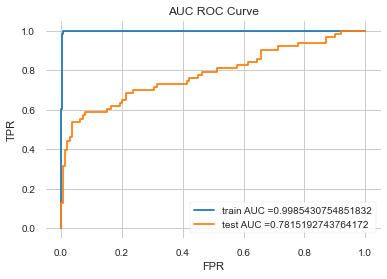

In [53]:
from sklearn.metrics import roc_curve, auc

RF_model= RandomForestClassifier(n_estimators=best_param['n_estimators'],min_samples_leaf=best_param['min_samples_leaf'],max_features=best_param['max_features'])
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
RF_model.fit(X_tr, y_train)


y_train_pred = RF_model.predict_proba(X_tr)    
y_test_pred = RF_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [54]:
y_test_predict=RF_model.predict(X_te)
print("Recall for Random Forest model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Random Forest model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Random Forest model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Random Forest model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Random Forest model:",metrics.log_loss(y_test,y_test_predict))

Recall for Random Forest model: 0.5873015873015873
Precision for Random Forest model: 0.6981132075471698
Accuracy for Random Forest model: 0.7931034482758621
F-score for Random Forest model: 0.6379310344827586
Log-loss for Random Forest model: 7.146016759335625


In [55]:
importances = RF_model.feature_importances_ 
print(importances)#array with importances of each feature
ind = np.arange(0, X_tr.shape[1]) #create an index array, with the number of features
#only keep features whose importance is greater than 0
X_tr_features_to_keep = X_tr[:,ind[importances > 0]] 
X_te_features_to_keep = X_te[:,ind[importances > 0]]

[0.00762688 0.00594319 0.01458231 0.01185042 0.01218081 0.011289
 0.00793646 0.0125941  0.00987293 0.00945093 0.00348248 0.00473935
 0.01658966 0.02046223 0.01311353 0.00709656 0.         0.00538594
 0.         0.         0.01307452 0.         0.         0.00196825
 0.14572314 0.16531956 0.18787826 0.20090306 0.11093644]


# XGBoost

In [56]:
n_estimators=[150,200,500,1000,1500,2000]
max_features=[1,2,3]
max_depth=[1,2,3,4,5,6,7,8,9,10]
gammas = [0.001, 0.01, 0.1, 1]
learning_rate_val=[0.01,0.1,1,10,100]
param_grid = {'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth,'gamma':gammas}
grid_search_xg = GridSearchCV(XGBClassifier(learning_rate=0.01), param_grid, cv=3)
grid_search_xg.fit(X_tr,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [57]:
best_param=grid_search_xg.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'gamma': 0.001, 'max_depth': 1, 'max_features': 1, 'n_estimators': 150}


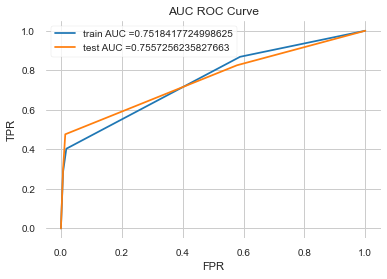

In [58]:
from sklearn.metrics import roc_curve, auc

XGB_model= XGBClassifier(learning_rate=0.01,n_estimators=best_param['n_estimators'],max_features=best_param['max_features'],max_depth=best_param['max_depth'],gammas=best_param['gamma'])
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
XGB_model.fit(X_tr, y_train)


y_train_pred = XGB_model.predict_proba(X_tr)    
y_test_pred = XGB_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [59]:
y_test_predict=XGB_model.predict(X_te)
print("Recall for  XGBoost model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for XGBoost model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for XGBoost model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for XGBoost model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for XGBoost model:",metrics.log_loss(y_test,y_test_predict))

Recall for  XGBoost model: 0.47619047619047616
Precision for XGBoost model: 0.9375
Accuracy for XGBoost model: 0.8275862068965517
F-score for XGBoost model: 0.631578947368421
Log-loss for XGBoost model: 5.954969325205588


# GradientBoosting

In [60]:
n_estimators=[150,200,500,1000,1500,2000]
max_features=[1,2,3]
max_depth=[1,2,3,4,5,6,7,8,9,10]
param_grid = {'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth}
grid_search_gbm = GridSearchCV(GradientBoostingClassifier(learning_rate= 0.01), param_grid, cv=3)
grid_search_gbm.fit(X_tr,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...e=None,
          

In [61]:
best_param=grid_search_gbm.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'max_depth': 1, 'max_features': 1, 'n_estimators': 1500}


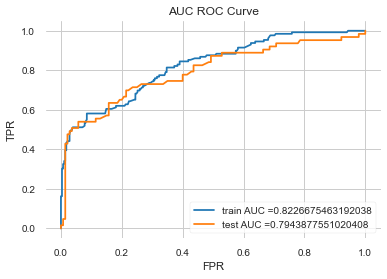

In [62]:
from sklearn.metrics import roc_curve, auc

GRAD_model= GradientBoostingClassifier(learning_rate=0.01,n_estimators=best_param['n_estimators'],max_features=best_param['max_features'],max_depth=best_param['max_depth'])
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
GRAD_model.fit(X_tr, y_train)


y_train_pred = GRAD_model.predict_proba(X_tr)    
y_test_pred = GRAD_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [63]:
y_test_predict=GRAD_model.predict(X_te)
print("Recall for  Gradient model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Gradient model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Gradient model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Gradient model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Gradient model:",metrics.log_loss(y_test,y_test_predict))

Recall for  Gradient model: 0.5079365079365079
Precision for Gradient model: 0.8421052631578947
Accuracy for Gradient model: 0.8177339901477833
F-score for Gradient model: 0.6336633663366337
Log-loss for Gradient model: 6.295268592099885


# SVM Model

In [64]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search_svm.fit(X_tr, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
best_param=grid_search_svm.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'C': 1, 'gamma': 0.01}


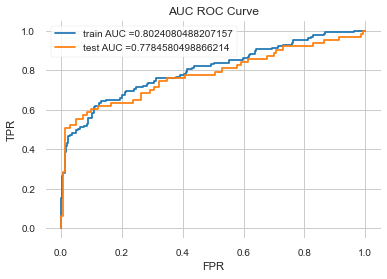

In [66]:
from sklearn.metrics import roc_curve, auc

SVM_model= SVC(kernel='rbf',C=best_param['C'],gamma=best_param['gamma'],probability=True)
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
SVM_model.fit(X_tr, y_train)


y_train_pred = SVM_model.predict_proba(X_tr)    
y_test_pred = SVM_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [67]:
y_test_predict=SVM_model.predict(X_te)
print("Recall for  SVM model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for SVM model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for SVM model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for SVM model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for SVM model:",metrics.log_loss(y_test,y_test_predict))

Recall for  SVM model: 0.47619047619047616
Precision for SVM model: 0.9375
Accuracy for SVM model: 0.8275862068965517
F-score for SVM model: 0.631578947368421
Log-loss for SVM model: 5.954969325205588
